<a href="https://colab.research.google.com/github/salianbharat/Deep/blob/main/Lung_cancer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning assignment for Lung Cancer Dataset**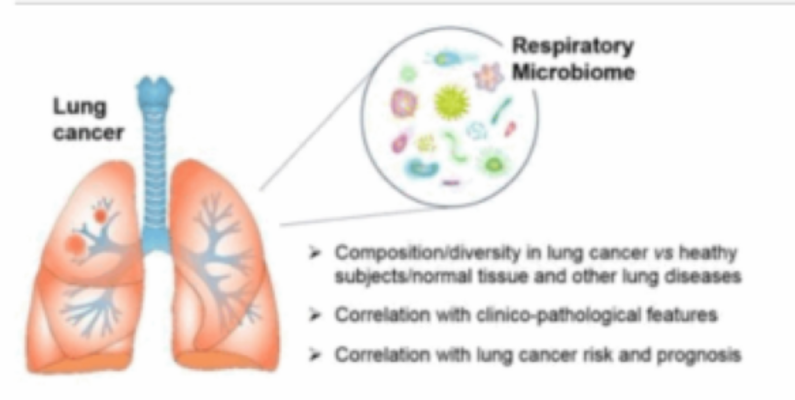

In [ ]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from tensorflow.keras.models import Sequential  # For building the neural network model
from tensorflow.keras.layers import Dense  # For adding layers to the model

In [ ]:
lc = pd.read_csv("/content/drive/MyDrive/Dataset/Deep Learning Assignments/survey lung cancer.csv")

In [ ]:
lc.head(35).T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
GENDER,M,M,F,M,F,F,M,F,F,M,...,M,F,M,F,M,F,M,M,F,M
AGE,69,74,59,63,63,75,52,51,68,53,...,65,61,69,53,55,57,62,56,67,59
SMOKING,1,2,1,2,1,1,2,2,2,2,...,1,2,1,2,1,2,2,2,2,1
YELLOW_FINGERS,2,1,1,2,2,2,1,2,1,2,...,2,2,1,2,2,2,1,2,2,2
ANXIETY,2,1,1,2,1,1,1,2,2,2,...,2,2,1,2,1,1,2,2,2,2
PEER_PRESSURE,1,1,2,1,1,1,1,2,1,2,...,1,1,2,1,1,1,1,1,1,1
CHRONIC DISEASE,1,2,1,1,1,2,1,1,1,2,...,1,1,1,2,1,1,1,1,2,1
FATIGUE,2,2,2,1,1,2,2,2,2,1,...,2,2,2,1,2,1,1,1,1,1
ALLERGY,1,2,1,1,1,2,1,2,1,2,...,1,2,1,1,1,1,2,1,1,1
WHEEZING,2,1,2,1,2,2,2,1,1,1,...,2,1,2,2,2,1,2,1,1,1


In [ ]:
lc.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [ ]:
print(lc.shape)

(309, 16)


In [ ]:
if lc.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [ ]:

# Get summary statistics of the dataset
print("Summary statistics of the dataset:")
print(lc.describe(include='all'))


# Display the unique values for the categorical columns
print("Unique values in categorical columns:")
print("GENDER:", lc['GENDER'].unique())
print("LUNG_CANCER:", lc['LUNG_CANCER'].unique())


Summary statistics of the dataset:
       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count      309.000000       309.000000  309.000000  309.00

In [ ]:
import numpy as np
lc.replace(['NaN', 'None', 'NA'], np.nan, inplace =True)

lc = lc.dropna()

Missing_values_after_drop = lc.isnull().sum()
print("Missing values in each column after dropping NaN rows:")
print(Missing_values_after_drop)

Missing values in each column after dropping NaN rows:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
lc.shape

(309, 16)

In [ ]:
lc.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
lc['AGE'].isna().any()


False

In [ ]:
# Get summary statistics of the dataset
print("Summary statistics of the dataset:")
print(lc.describe(include='all'))


# Display the unique values for the categorical columns
print("Unique values in categorical columns:")
print("GENDER:", lc['GENDER'].unique())
print("LUNG_CANCER:", lc['LUNG_CANCER'].unique())

Summary statistics of the dataset:
       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count      309.000000       309.000000  309.000000  309.00

# Dataset Overview
**Number of entries:** 309
**Number of columns:** 16
**Columns and Data Types:**
**GENDER (object):** Categorical, represents the gender of the individuals.
**AGE (int64):** Numerical, represents the age of the individuals.
**SMOKING to CHEST PAIN (int64)**: Categorical, binary features indicating the presence (2) or absence (1) of various conditions.
**LUNG_CANCER (object):** Categorical, the target variable indicating the presence of lung cancer.


# Steps Forward

**Data Exploration:**

*   Visualize distributions of numerical features.
*   Analyze the relationship between features and the target variable.
*   Explore correlations between features.


**Preprocessing and Feature Engineering:**



*  Standardise the varibale
*  Encode categorical variables.
*  Standardize/normalize numerical features.



Checking Unique values for Categorical variable GENDER and LUNG_CANCER

# Preprocessing and Feature Engineering

**Encoding Categorical Variables**

In [ ]:
# Check the unique values for each column in the dataset
unique_values = lc.nunique()
print("Unique values in each column:")
print(unique_values)

# Display unique values for each column
for column in lc.columns:
    print(f"Unique values in {column}: {lc[column].unique()}")


Unique values in each column:
GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64
Unique values in GENDER: ['M' 'F']
Unique values in AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values in SMOKING: [1 2]
Unique values in YELLOW_FINGERS: [2 1]
Unique values in ANXIETY: [2 1]
Unique values in PEER_PRESSURE: [1 2]
Unique values in CHRONIC DISEASE: [1 2]
Unique values in FATIGUE : [2 1]
Unique values in ALLERGY : [1 2]
Unique values in WHEEZING: [2 1]
Unique values in ALCOHOL CONSUMING: [2 1]
Unique val

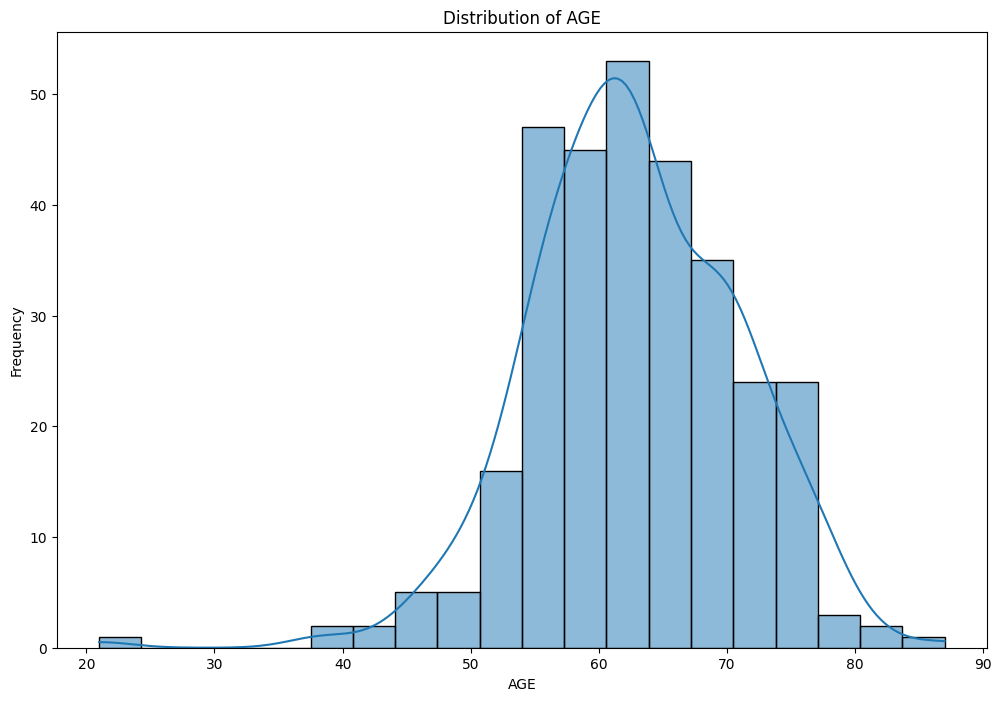

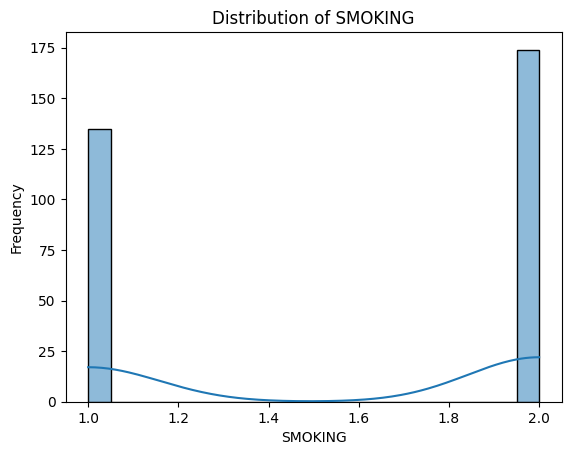

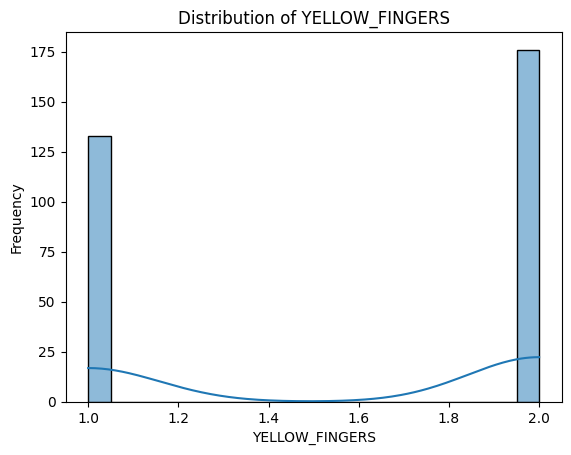

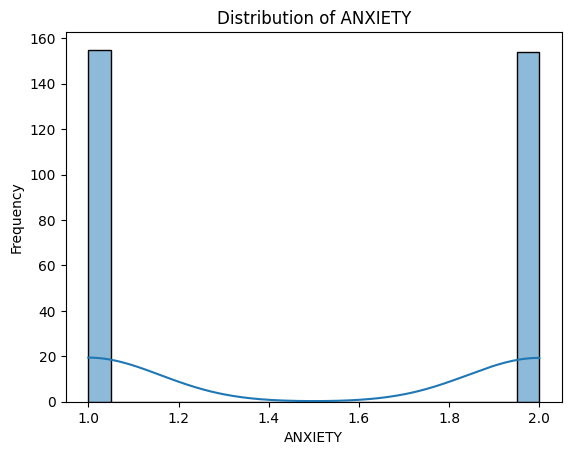

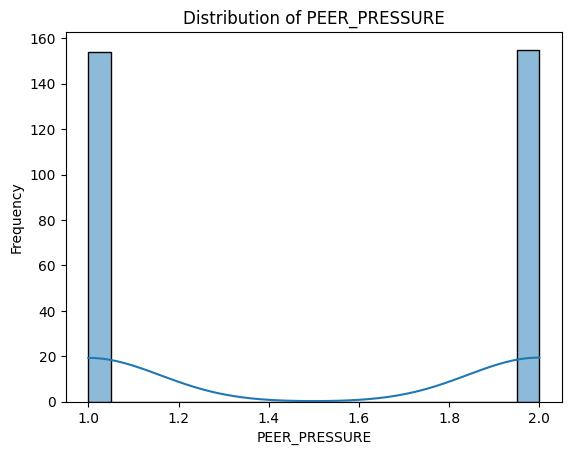

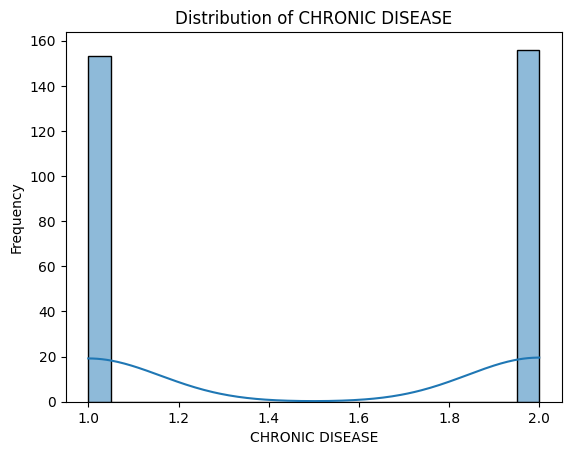

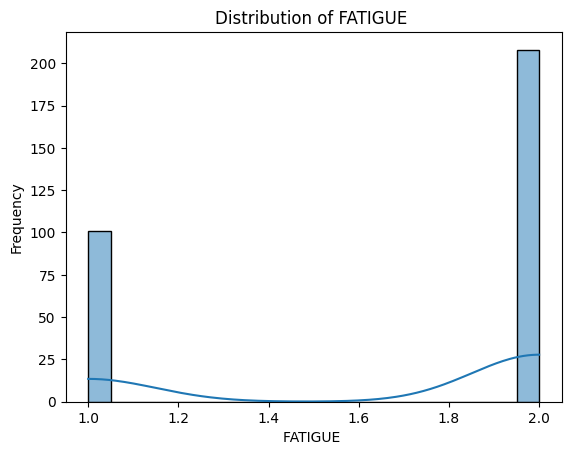

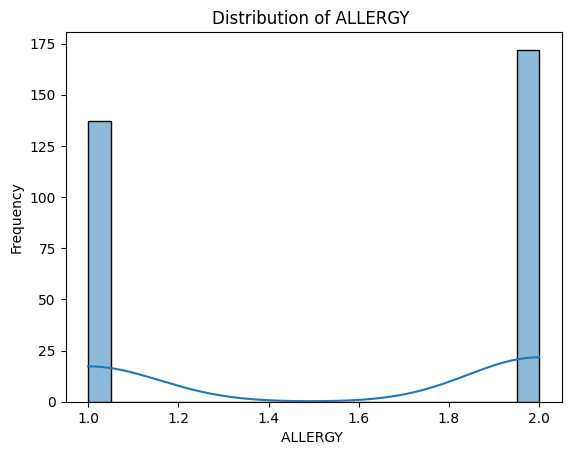

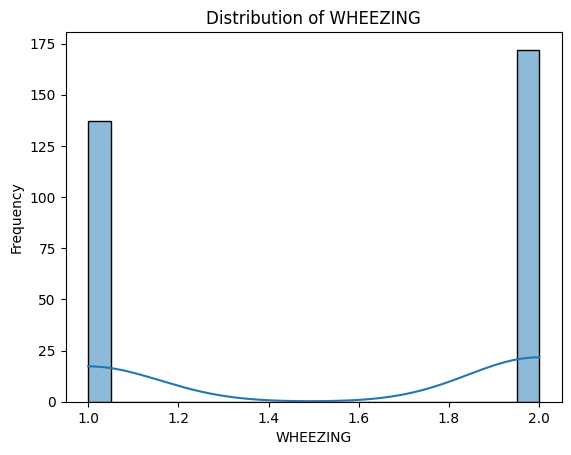

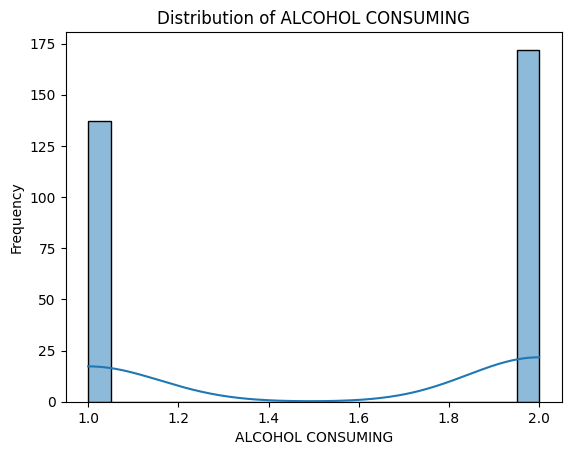

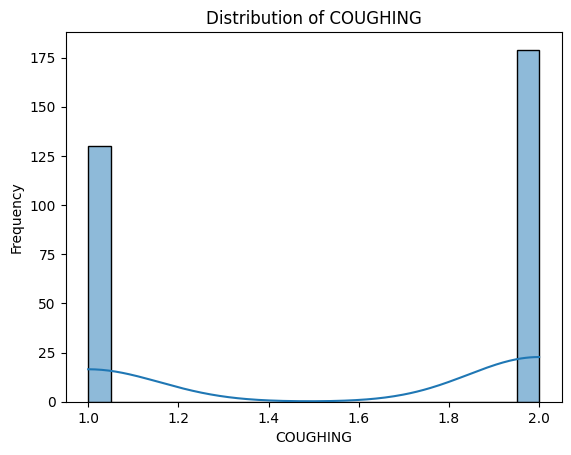

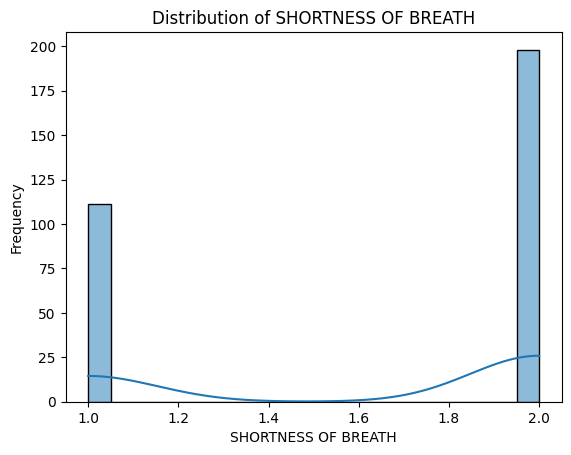

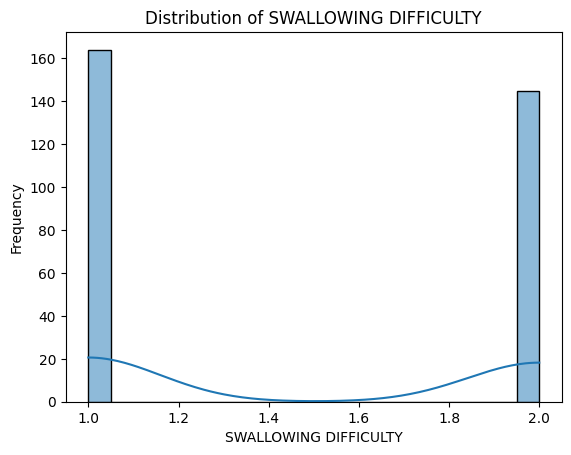

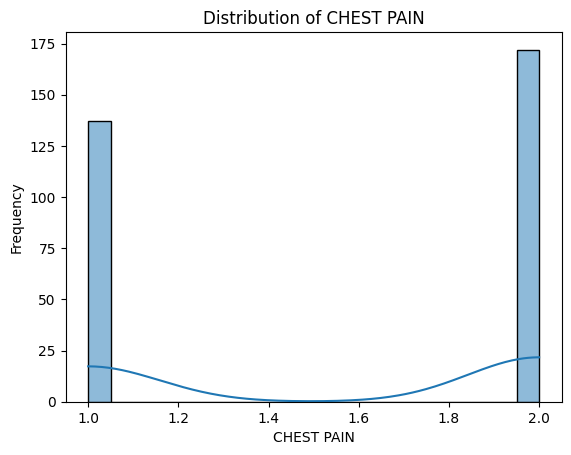

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = lc.select_dtypes(include=['int64']).columns

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    sns.histplot(data=lc, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


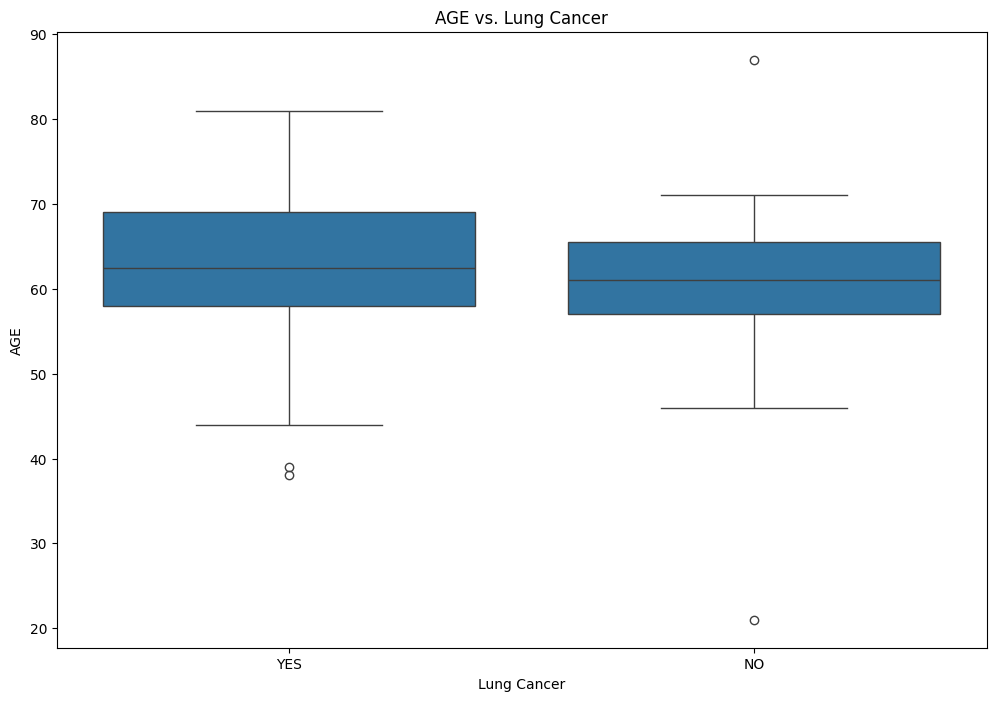

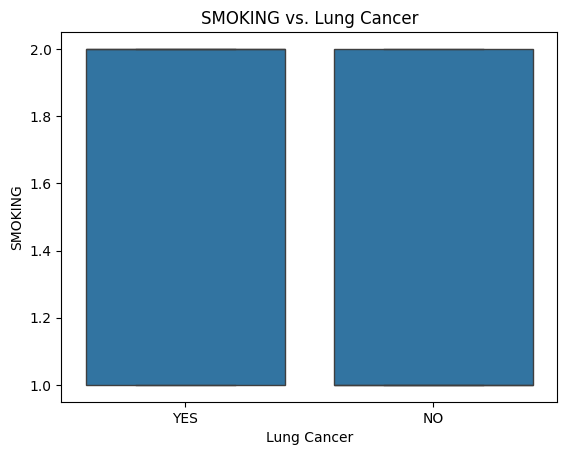

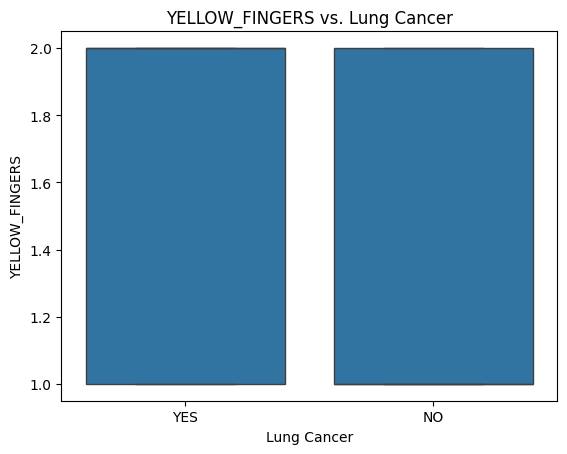

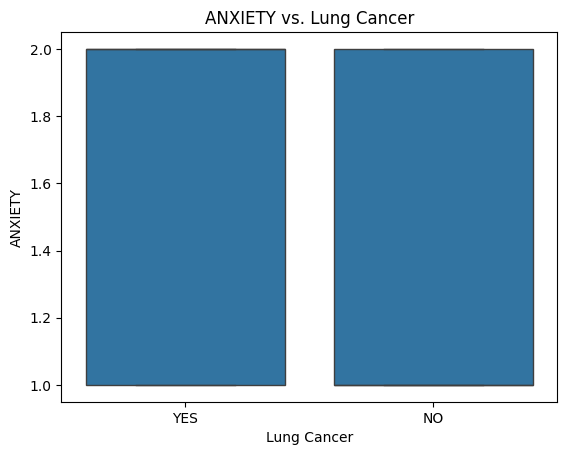

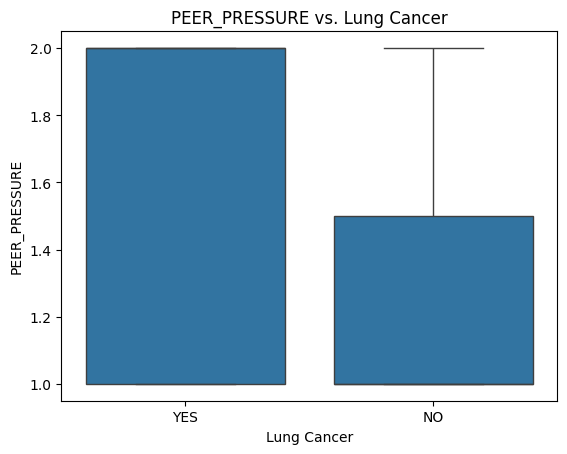

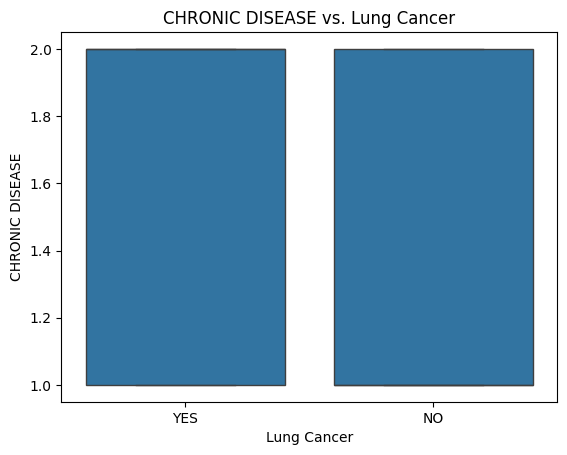

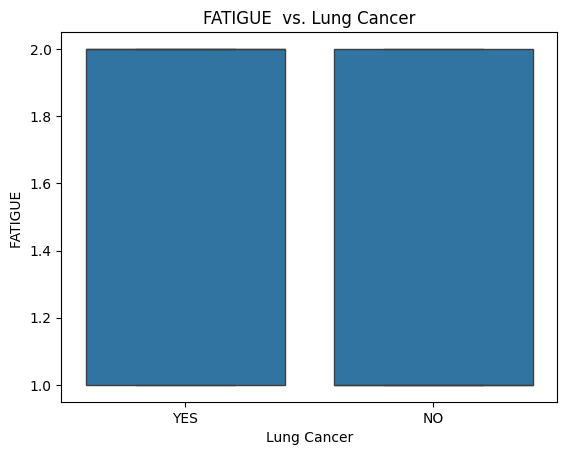

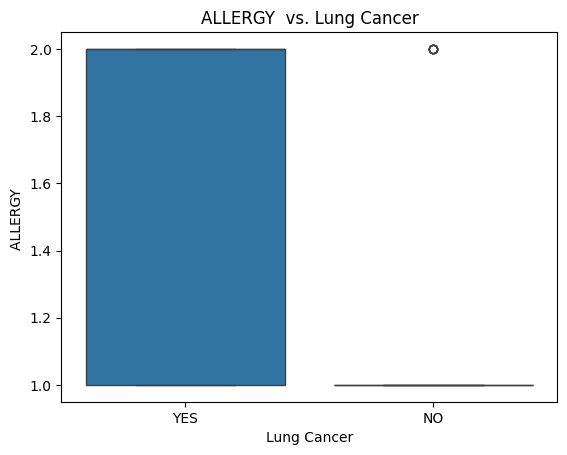

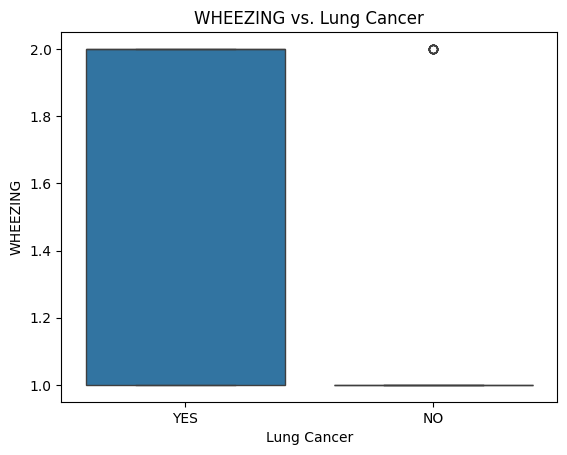

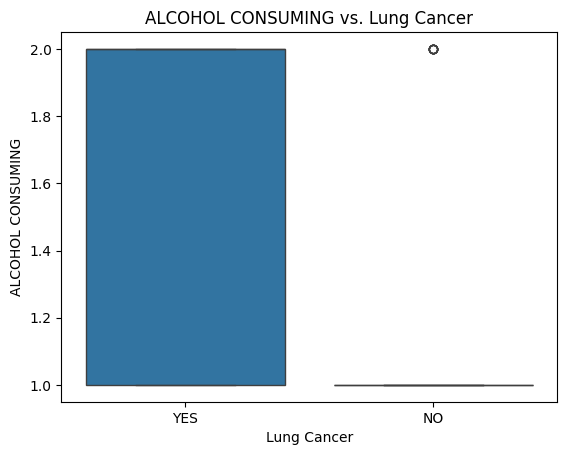

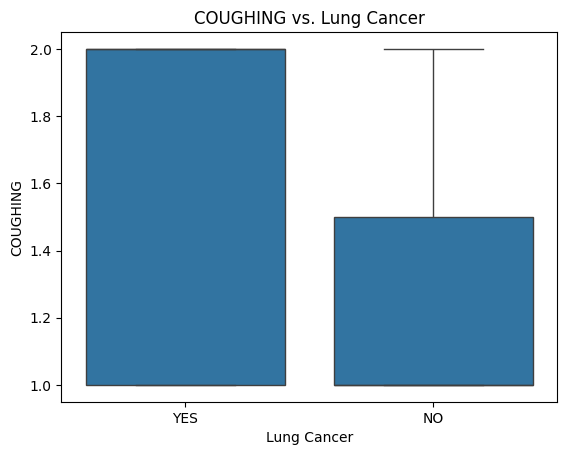

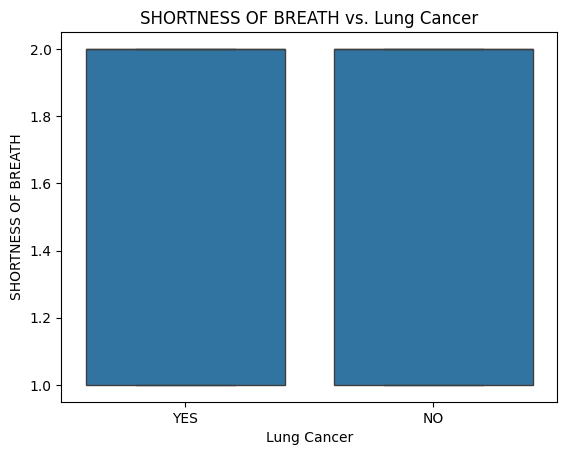

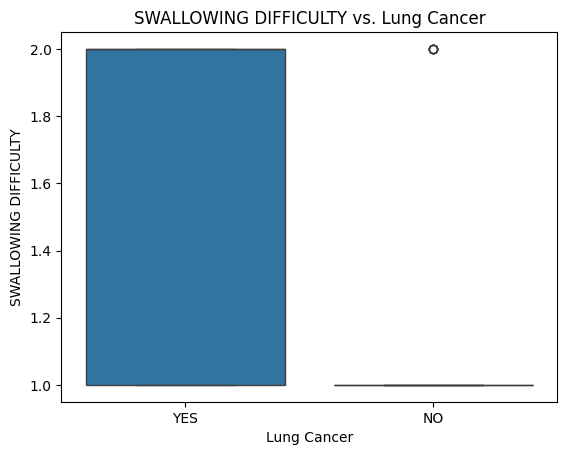

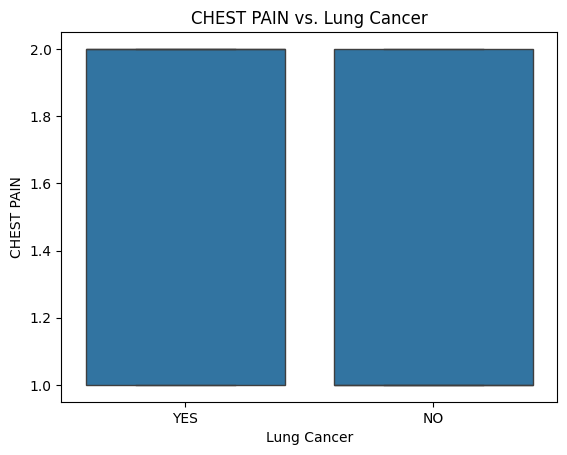

In [ ]:
# Plot box plots for numerical features vs. target
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    sns.boxplot(data=lc, x='LUNG_CANCER', y=column)
    plt.title(f'{column} vs. Lung Cancer')
    plt.xlabel('Lung Cancer')
    plt.ylabel(column)
    plt.show()


In [ ]:
#Create a Label encoder object
label_encoder = LabelEncoder()

#Encode Gender and Lung Cancer Column
lc['GENDER'] = label_encoder.fit_transform(lc['GENDER'])

lc['LUNG_CANCER'] = label_encoder.fit_transform(lc['LUNG_CANCER'])

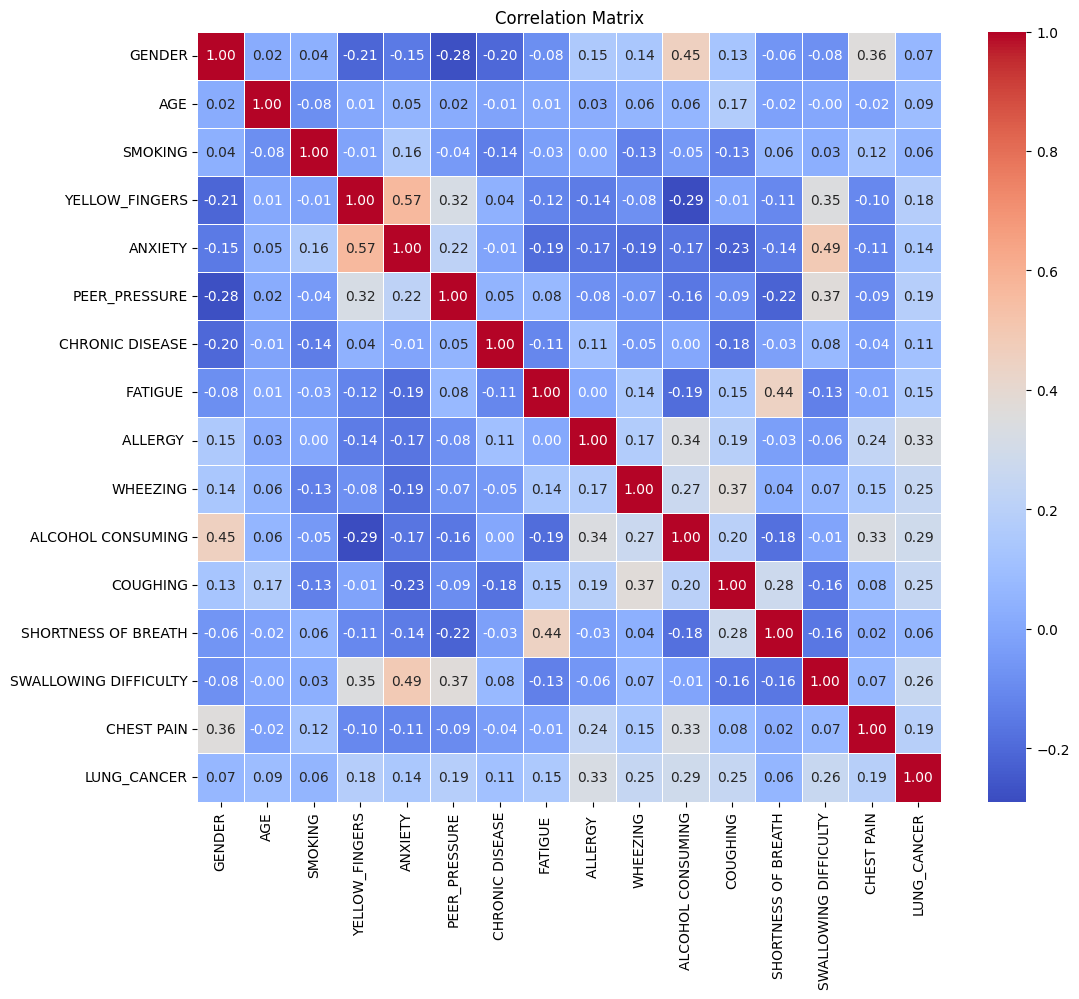

In [ ]:
# Compute the correlation matrix
correlation_matrix = lc.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each predictor variable
X = lc.drop(columns=['LUNG_CANCER'])  # Exclude the target variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                  Feature        VIF
0                  GENDER   3.147051
1                     AGE  43.119904
2                 SMOKING  11.160631
3          YELLOW_FINGERS  19.077565
4                 ANXIETY  19.973701
5           PEER_PRESSURE  13.975045
6         CHRONIC DISEASE  10.765420
7                FATIGUE   18.994946
8                ALLERGY   13.129242
9                WHEEZING  14.307367
10      ALCOHOL CONSUMING  17.794841
11               COUGHING  17.472517
12    SHORTNESS OF BREATH  18.783896
13  SWALLOWING DIFFICULTY  15.606034
14             CHEST PAIN  13.922865


In [ ]:
#Split the dataset into features(X) and target variable (y)

X = lc.drop(columns=['LUNG_CANCER'])
y= lc['LUNG_CANCER']

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after resampling
print("Class distribution before resampling:")
print(y.value_counts())

print("\nClass distribution after resampling:")
print(y_resampled.value_counts())



# Split the data into training and testing sets (80% training, 20% testing)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
#print("Shape of X_train:", X_train.shape)
#print("Shape of y_train:", y_train.shape)
#print("Shape of X_test:", X_test.shape)
#print("Shape of y_test:", y_test.shape)

Class distribution before resampling:
LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

Class distribution after resampling:
LUNG_CANCER
1    270
0    270
Name: count, dtype: int64


In [ ]:
#from sklearn.model_selection import train_test_split

# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Shape of training data:", X_train.shape, y_train.shape)
print("Shape of testing data:", X_test.shape, y_test.shape)


Shape of training data: (432, 15) (432,)
Shape of testing data: (108, 15) (108,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=15, activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
11/11 [==============================] - 2s 46ms/step - loss: 1.2351 - accuracy: 0.4986 - val_loss: 0.6990 - val_accuracy: 0.4943
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 0.7729 - accuracy: 0.5246 - val_loss: 0.6965 - val_accuracy: 0.4943
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 0.7189 - accuracy: 0.5333 - val_loss: 0.6669 - val_accuracy: 0.6207
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6403 - accuracy: 0.6493 - val_loss: 0.6263 - val_accuracy: 0.7356
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.5975 - accuracy: 0.7565 - val_loss: 0.6058 - val_accuracy: 0.7471
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.5755 - accuracy: 0.8058 - val_loss: 0.5935 - val_accuracy: 0.7586
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.5636 - accuracy: 0.8145 - val_loss: 0.5818 - val_accuracy: 0.7241
Epoch 8/50
11/11

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.8611
Test Loss: 0.3011132478713989
Test Accuracy: 0.8611111044883728


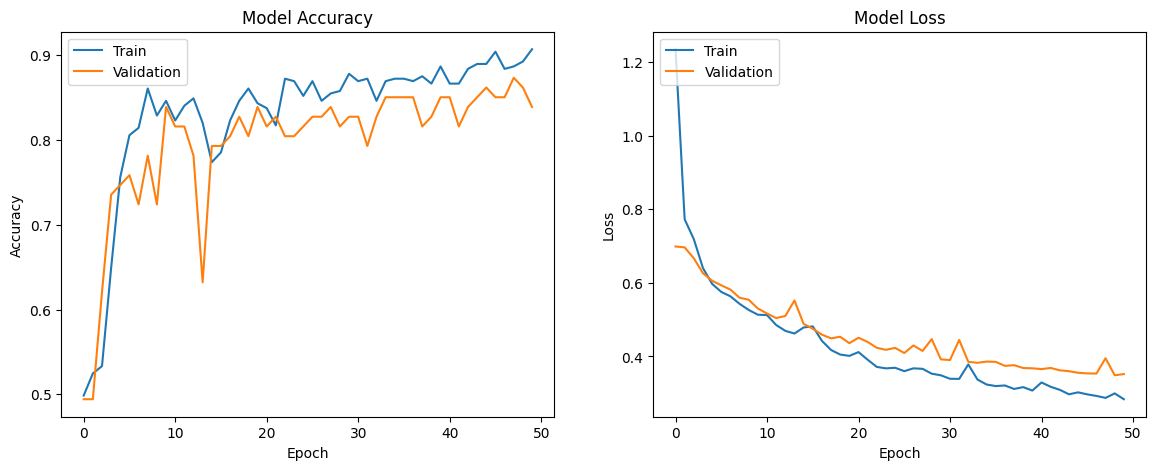

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict the test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate a classification report
print(classification_report(y_test, y_pred, target_names=['NO', 'YES']))


4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

          NO       0.86      0.84      0.85        51
         YES       0.86      0.88      0.87        57

    accuracy                           0.86       108
   macro avg       0.86      0.86      0.86       108
weighted avg       0.86      0.86      0.86       108

